In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

from sklearn.preprocessing import LabelEncoder
from keras.layers import LSTM,Dense,Dropout, Reshape, Conv1D, GlobalMaxPooling1D, MaxPooling1D, Flatten
from keras.models import Sequential
from keras.layers import Embedding,SimpleRNN
from tensorflow.keras.preprocessing.sequence import pad_sequences
from keras.preprocessing.text import Tokenizer
from keras.utils import np_utils

from tensorflow.keras.optimizers import Adam

from gensim.models import Word2Vec

import matplotlib.pyplot as plt

In [2]:
from google.cloud import storage
import os
import io
client = storage.Client()
bucket = client.get_bucket('nlp_final_data')

blob = bucket.blob('top_songs_final.csv')
content = blob.download_as_string()

df = pd.read_csv(io.BytesIO(content))

In [3]:
df['data_tokenized'] = df['data_tokenized'].apply(lambda x: x.strip('[]').replace('\'', '').split(', '))

In [4]:
X = df['data_tokenized']
y = df['tag']

In [5]:
# split the balanced data into training and testing sets
#X_train, X_test, y_train, y_test = train_test_split(X_vec, y, test_size=0.2,stratify=y, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,stratify=y, random_state=42)

In [6]:
tokenize = Tokenizer(char_level=False)
tokenize.fit_on_texts(X) # only fit on train

# we will need this later
num_words = len(tokenize.word_index)+1

In [7]:
num_words

106895

In [8]:
x_train = tokenize.texts_to_sequences(X_train)
x_test = tokenize.texts_to_sequences(X_test)

encoder = LabelEncoder()
encoder.fit(y_train)
y_train = encoder.transform(y_train)
y_test = encoder.transform(y_test)

num_classes = np.max(y_train) + 1
y_train = np_utils.to_categorical(y_train, num_classes)
y_test = np_utils.to_categorical(y_test, num_classes)

In [29]:
encoder.classes_

array(['country', 'pop', 'rap', 'rb', 'rock'], dtype=object)

In [9]:
max_len = 0
for song in x_train:
    if len(song)>max_len:
        max_len = len(song)

In [28]:
max_len

334

In [11]:
max_log_length = max_len
x_train = pad_sequences(x_train, maxlen=max_log_length)
x_test = pad_sequences(x_test, maxlen=max_log_length)

## Only one Hidden Dense Layer and Output Dimension changed to 128

In [ ]:
model3 = Sequential()

model3.add(Embedding(input_dim=num_words,output_dim=128,input_length=max_log_length))

num_filters = 128
kernel_sizes = [2,3,4]
for kernel_size in kernel_sizes:
    model3.add(Conv1D(num_filters, kernel_size, activation='relu'))
    
model3.add(MaxPooling1D(pool_size=2))    
model3.add(LSTM(units=64,recurrent_dropout=0.5))
model3.add(Dropout(0.5))

# Add Dense layers
hidden_units = [128]
for units in hidden_units:
    model3.add(Dense(units, activation='relu'))
    model3.add(Dropout(0.5))
    
model3.add(Dense(num_classes,activation='softmax'))

# compile the model
model3.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])



In [14]:
history = model3.fit(x_train, y_train,
                    batch_size=128,
                    epochs=3,
                    verbose=1,
                    validation_split=0.1)

Epoch 1/3
1305/1305 [==============================] - 768s 585ms/step - loss: 1.1908 - accuracy: 0.4909 - val_loss: 1.0450 - val_accuracy: 0.5708
Epoch 2/3
1305/1305 [==============================] - 739s 566ms/step - loss: 1.0030 - accuracy: 0.6008 - val_loss: 1.0506 - val_accuracy: 0.5816
Epoch 3/3
1305/1305 [==============================] - 734s 563ms/step - loss: 0.9154 - accuracy: 0.6418 - val_loss: 1.0131 - val_accuracy: 0.5939


## One Kernal of Size 2 and output dimension: 128

In [15]:
model3 = Sequential()

model3.add(Embedding(input_dim=num_words,output_dim=128,input_length=max_log_length))

num_filters = 128
kernel_sizes = [2]
for kernel_size in kernel_sizes:
    model3.add(Conv1D(num_filters, kernel_size, activation='relu'))
    
model3.add(MaxPooling1D(pool_size=2))    
model3.add(LSTM(units=64,recurrent_dropout=0.5))
model3.add(Dropout(0.5))

# Add Dense layers
hidden_units = [128]
for units in hidden_units:
    model3.add(Dense(units, activation='relu'))
    model3.add(Dropout(0.5))
    
model3.add(Dense(num_classes,activation='softmax'))

# compile the model
model3.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])



In [16]:
history = model3.fit(x_train, y_train,
                    batch_size=128,
                    epochs=3,
                    verbose=1,
                    validation_split=0.1)

Epoch 1/3
1305/1305 [==============================] - 556s 423ms/step - loss: 1.1440 - accuracy: 0.5261 - val_loss: 1.0213 - val_accuracy: 0.5890
Epoch 2/3
1305/1305 [==============================] - 553s 424ms/step - loss: 0.9781 - accuracy: 0.6133 - val_loss: 0.9885 - val_accuracy: 0.5983
Epoch 3/3
1305/1305 [==============================] - 555s 425ms/step - loss: 0.8837 - accuracy: 0.6548 - val_loss: 1.0546 - val_accuracy: 0.5883


## Num Filters 64

In [17]:
model3 = Sequential()

model3.add(Embedding(input_dim=num_words,output_dim=128,input_length=max_log_length))

num_filters = 64
kernel_sizes = [2,3]
for kernel_size in kernel_sizes:
    model3.add(Conv1D(num_filters, kernel_size, activation='relu'))
#model3.add(Conv1D(128, 3, activation='relu'))

model3.add(MaxPooling1D(pool_size=5))
model3.add(LSTM(units=64,recurrent_dropout=0.5))
model3.add(Dropout(0.5))

# Add Dense layers
hidden_units = [128, 64]
for units in hidden_units:
    model3.add(Dense(units, activation='relu'))
    model3.add(Dropout(0.5))
    
model3.add(Dense(num_classes,activation='softmax'))

# compile the model
model3.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [18]:
history = model3.fit(x_train, y_train,
                    batch_size=128,
                    epochs=3,
                    verbose=1,
                    validation_split=0.1)

Epoch 1/3
1305/1305 [==============================] - 319s 240ms/step - loss: 1.1974 - accuracy: 0.4866 - val_loss: 1.0177 - val_accuracy: 0.5794
Epoch 2/3
1305/1305 [==============================] - 337s 258ms/step - loss: 1.0109 - accuracy: 0.5976 - val_loss: 1.0643 - val_accuracy: 0.5539
Epoch 3/3
1305/1305 [==============================] - 315s 241ms/step - loss: 0.9259 - accuracy: 0.6374 - val_loss: 1.0157 - val_accuracy: 0.5953


## output dimension: 32, no dropout after lstm

In [14]:
model3 = Sequential()

model3.add(Embedding(input_dim=num_words,output_dim=32,input_length=max_log_length))

num_filters = 128
kernel_sizes = [2,3,4]
for kernel_size in kernel_sizes:
    model3.add(Conv1D(num_filters, kernel_size, activation='relu'))
#model3.add(Conv1D(128, 3, activation='relu'))

model3.add(MaxPooling1D(pool_size=5))
model3.add(LSTM(units=128,recurrent_dropout=0.5))

# Add Dense layers
hidden_units = [128, 64]
for units in hidden_units:
    model3.add(Dense(units, activation='relu'))
    model3.add(Dropout(0.5))
    
model3.add(Dense(num_classes,activation='softmax'))

# compile the model
model3.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [15]:
history = model3.fit(x_train, y_train,
                    batch_size=128,
                    epochs=3,
                    verbose=1,
                    validation_split=0.1)

Epoch 1/3
1305/1305 [==============================] - 477s 362ms/step - loss: 1.2080 - accuracy: 0.4733 - val_loss: 1.0531 - val_accuracy: 0.5610
Epoch 2/3
1305/1305 [==============================] - 467s 358ms/step - loss: 0.9356 - accuracy: 0.6295 - val_loss: 1.0085 - val_accuracy: 0.5883


In [25]:
def plot_train(history):
    """
    Plot the keras epoch results thru training
    """
    h = history.history
    epochs = range(1, len(h['accuracy']) + 1)
    plt.plot(epochs, h['accuracy'], 'go', label='Training acc')
    plt.plot(epochs, h['val_accuracy'], 'g', label='Validation acc')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

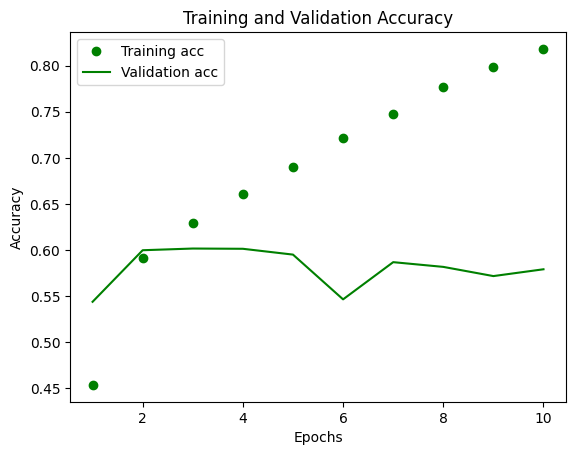

In [28]:
plot_train(history)

## Two convolution layers with maxpooling size 5

In [21]:
model3 = Sequential()

model3.add(Embedding(input_dim=num_words,output_dim=128,input_length=max_log_length))

num_filters = 128

model3.add(Conv1D(num_filters, 5, activation='relu'))
model3.add(MaxPooling1D(pool_size=5))

# model3.add(LSTM(units=128,recurrent_dropout=0.5))
# model3.add(Dropout(0.5))

model3.add(Conv1D(num_filters, 5, activation='relu'))
model3.add(MaxPooling1D(pool_size=5))

model3.add(Flatten())

# Add Dense layers
hidden_units = [128, 64]
for units in hidden_units:
    model3.add(Dense(units, activation='relu'))
    model3.add(Dropout(0.5))
    
model3.add(Dense(num_classes,activation='softmax'))

# compile the model
model3.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [22]:
history = model3.fit(x_train, y_train,
                    batch_size=128,
                    epochs=3,
                    verbose=1,
                    validation_split=0.1)

Epoch 1/3
1305/1305 [==============================] - 271s 207ms/step - loss: 1.1696 - accuracy: 0.4992 - val_loss: 1.0265 - val_accuracy: 0.5699
Epoch 2/3
1305/1305 [==============================] - 269s 206ms/step - loss: 0.9769 - accuracy: 0.6113 - val_loss: 0.9915 - val_accuracy: 0.5969
Epoch 3/3
1305/1305 [==============================] - 270s 207ms/step - loss: 0.8600 - accuracy: 0.6625 - val_loss: 1.0359 - val_accuracy: 0.5966


In [31]:
model3.save('model_best_05_20.h5')

In [32]:
blob_name = 'model_best_05_20.h5'
client = storage.Client()

blob = bucket.blob(blob_name)
blob.upload_from_filename(blob_name)

## Get Confusion Matrix and Model Accuracy

In [17]:
import keras
best_model = keras.models.load_model("model_top_songs.h5")

In [20]:
predictions = best_model.predict(x_test)

In [24]:
import sklearn
matrix = sklearn.metrics.confusion_matrix(y_test.argmax(axis=1), predictions.argmax(axis=1))

In [27]:
matrix

array([[7496,  459,   76,  440,  841],
       [2269, 2527,  503, 1804, 2257],
       [  79,  230, 7750,  685,  291],
       [1387, 1367, 1214, 4838,  569],
       [2019, 1607,  274,  546, 4838]])

In [45]:
# Calculate row sums
row_sums = np.sum(matrix, axis=1)

# Divide each element of a row by the corresponding row sum
normalized_matrix = matrix / row_sums[:, np.newaxis]

In [46]:
normalized_matrix

array([[0.80498282, 0.04929124, 0.00816151, 0.04725086, 0.09031357],
       [0.24241453, 0.26997863, 0.05373932, 0.19273504, 0.24113248],
       [0.00874377, 0.02545656, 0.85777532, 0.07581627, 0.03220808],
       [0.14794667, 0.14581333, 0.12949333, 0.51605333, 0.06069333],
       [0.21747092, 0.17309349, 0.02951314, 0.05881086, 0.52111159]])

In [30]:
labels = ['country', 'pop', 'rap', 'rb', 'rock']

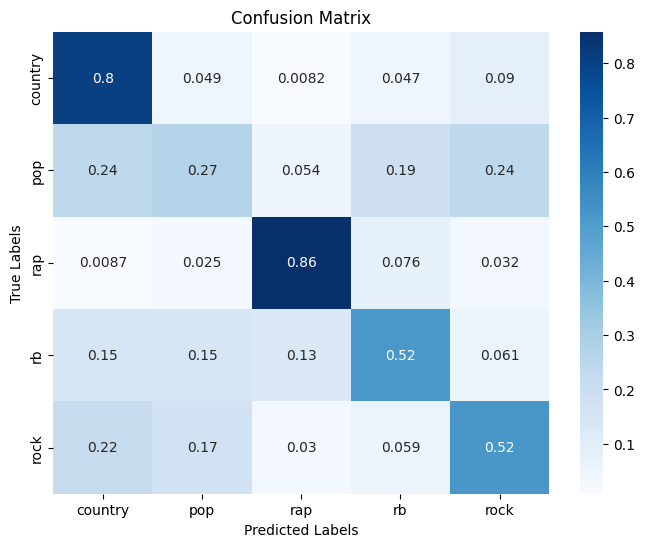

In [48]:
pd.set_option('display.float_format', '{:.0f}'.format)
import seaborn as sns
# Convert confusion matrix to a DataFrame
cm_df = pd.DataFrame(normalized_matrix, index=labels, columns=labels)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_df, annot=True, cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [38]:
precision = np.diag(matrix) / np.sum(matrix, axis=0)

In [39]:
precision

array([0.56573585, 0.4082391 , 0.78944688, 0.58198003, 0.55002274])